# Load the dataset

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"Titanic.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Preprocess the dataset

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
#Finding the missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [11]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [12]:
df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [13]:
corr_df=df.corr()
corr_df['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.191514
Parch       0.159120
SibSp       0.099943
Age        -0.000013
Pclass     -0.108615
Name: Survived, dtype: float64

In [14]:
df['family_size']=df['SibSp']+df['Parch']

In [15]:
corr_df=df.corr()
corr_df['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.191514
family_size    0.161803
Parch          0.159120
SibSp          0.099943
Age           -0.000013
Pclass        -0.108615
Name: Survived, dtype: float64

In [16]:
df.drop(['SibSp','Parch'],axis=1,inplace=True)

In [17]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'family_size'], dtype='object')

In [18]:
df.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age            86
Fare            1
Embarked        0
family_size     0
dtype: int64

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#Finding the correlation 

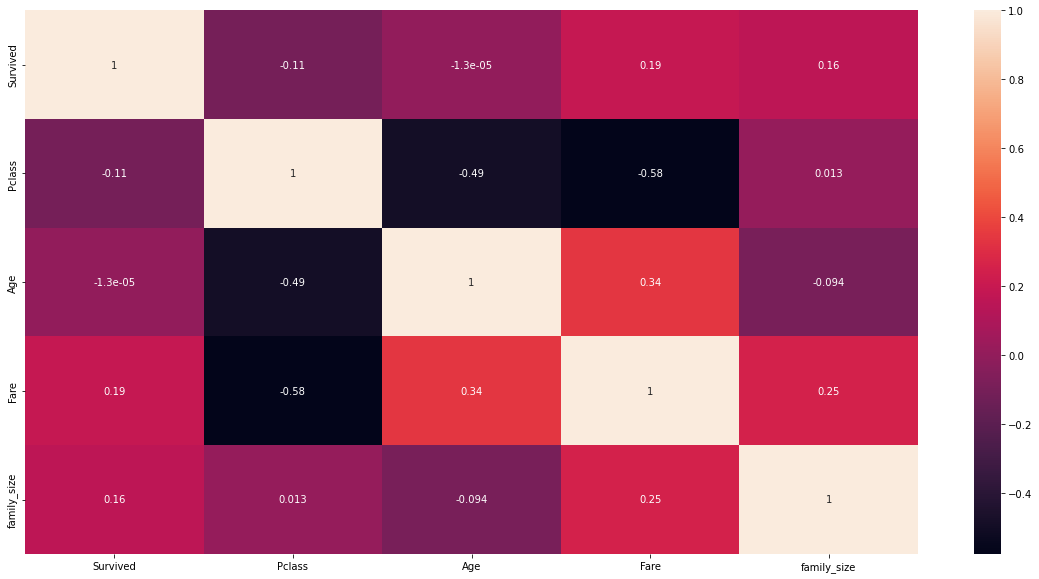

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [22]:
df.skew()

C:\Users\ACER\AppData\Local\Temp\ipykernel_18276\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Survived       0.568991
Pclass        -0.534170
Age            0.457361
Fare           3.687213
family_size    3.168542
dtype: float64

In [23]:
import numpy as np

In [24]:
df["Age"].replace(np.nan,df["Age"].mean(),inplace=True)

In [25]:
df["Fare"].replace(np.nan,df["Fare"].median(),inplace=True)

In [26]:
df.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
family_size    0
dtype: int64

# Exploratory Data Analysis

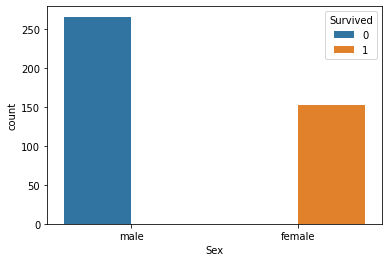

In [27]:
sns.countplot(data=df,x='Sex',hue='Survived')
plt.show()

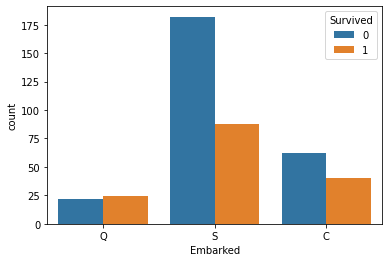

In [28]:
sns.countplot(data=df,x='Embarked',hue='Survived')
plt.show()

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


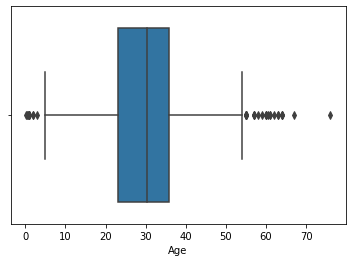

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


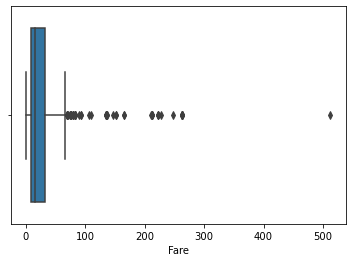

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


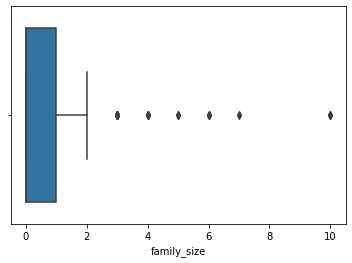

In [29]:
x=["Age","Fare","family_size"]
for i in x:
    sns.boxplot(df[i])
    plt.show()

In [30]:
def rem_out(y):
    Q1=y.quantile(0.25)
    Q3=y.quantile(0.75)
    IQR=Q3-Q1
    l=Q1-1.5*IQR
    u=Q3+1.5*IQR
    print(l,u)

In [31]:
rem_out(df["Age"])

3.875 54.875


In [32]:
for i in df["Age"]:
    if i<3.875:
        df["Age"]=df["Age"].replace(i,np.nan)

In [33]:
df["Age"].replace(np.nan,df["Age"].mean(),inplace=True)

In [34]:
rem_out(df["Fare"])

-27.468312499999996 66.8359875


In [35]:
for i in df["Fare"]:
    if i>66.8359875:
        df["Fare"]=df["Fare"].replace(i,np.nan)

In [36]:
df["Fare"].replace(np.nan,df["Fare"].mean(),inplace=True)

In [37]:
df["Fare"].isnull().sum()

0

In [38]:
rem_out(df["family_size"])

-1.5 2.5


In [39]:
for i in df["family_size"]:
    if i>2.5:
        df["family_size"]=df["family_size"].replace(i,np.nan)

In [40]:
df["family_size"].replace(np.nan,df['family_size'].mean(),inplace=True)

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


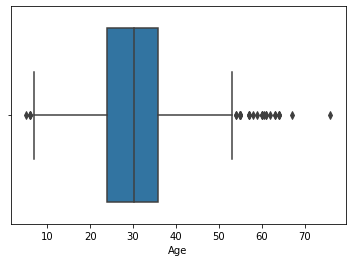

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


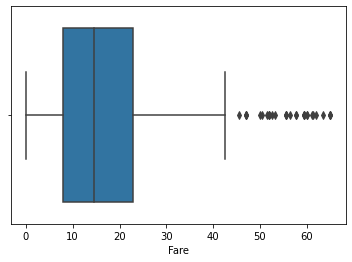

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


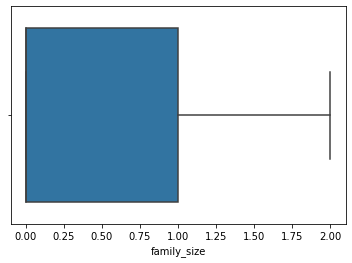

In [41]:
x=["Age","Fare","family_size"]
for i in x:
    sns.boxplot(df[i])
    plt.show()

In [42]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked,family_size
0,0,3,male,34.50000,7.829200,Q,0.0
1,1,3,female,47.00000,7.000000,S,1.0
2,0,2,male,62.00000,9.687500,Q,0.0
3,0,3,male,27.00000,8.662500,S,0.0
4,1,3,female,22.00000,12.287500,S,2.0
...,...,...,...,...,...,...,...
413,0,3,male,30.27259,8.050000,S,0.0
414,1,1,female,39.00000,18.251274,C,0.0
415,0,3,male,38.50000,7.250000,S,0.0
416,0,3,male,30.27259,8.050000,S,0.0


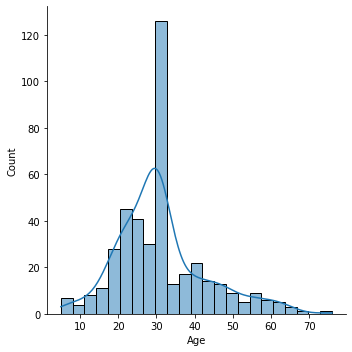

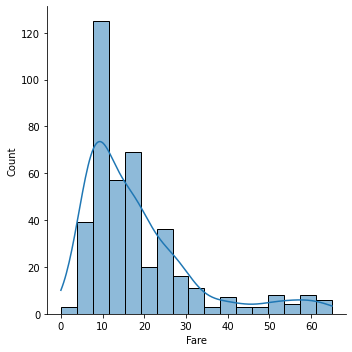

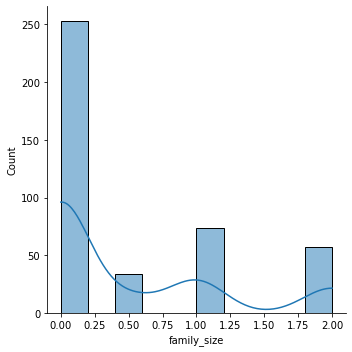

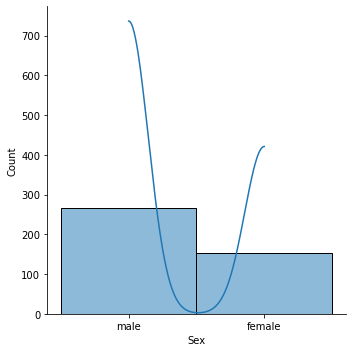

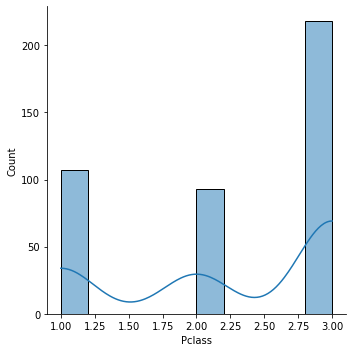

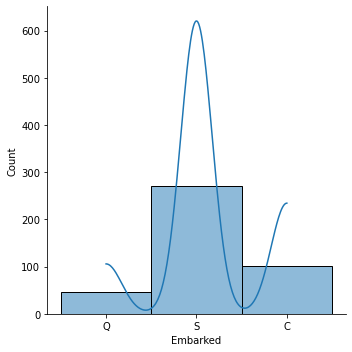

KeyError: 'survived'

In [43]:
y=["Age","Fare","family_size","Sex","Pclass","Embarked","survived"]
for i in y:
    sns.displot(df[i],kde=True)
    plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
ln=LabelEncoder()

In [ ]:
z=["Sex","Embarked"]
for i in z:
    df[i]=ln.fit_transform(df[i])

In [ ]:
df

# Model Building

In [ ]:
x=df.drop("Survived",axis=1)
x

In [ ]:
y=df["Survived"]
y

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.head(5)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
print("train accuracy :",lr.score(x_train,y_train))
print("test accuracy :",lr.score(x_test,y_test))
print("Mean squared error :",mean_squared_error(y_test,y_pred))
print("R squared",r2_score(y_test,y_pred))